# Analisis Data

Pada notebook ini kita akan melakukan analisis data sesuai dengan ketentuan:

1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.  
2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.  
3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.  
4. Tampilkan jumlah label dari semua attribute yang bernilai object.  
5. Visualisasikan dataset dengan salah satu grafik yang sesuai.  
6. Tampilkan korelasi dataset menggunakan heatmap.  
7. Tulis kesimpulan dari hasil analisis dan visualisasi data.  


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca dataset
df = pd.read_csv("Automobile.csv")

# Menampilkan 5 record pertama untuk memastikan data terbaca
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


## Statistik Deskriptif

Pada tahap ini kita menampilkan statistik deskriptif dari kolom numerik, 
meliputi rata-rata, standar deviasi, nilai minimum, maksimum, serta kuartil (Q1, Q2, Q3).


In [15]:
# Statistik deskriptif numerik
desc = df.describe().T

# Menambahkan Q1, Q2, Q3
desc["Q1"] = df.quantile(0.25)
desc["Q2"] = df.quantile(0.50)
desc["Q3"] = df.quantile(0.75)

desc[["mean", "std", "min", "max", "Q1", "Q2", "Q3"]]


,mean,std,min,max,Q1,Q2,Q3
mpg,23.514573,7.815984,9.0,46.6,17.500,23.0,29.000
cylinders,5.454774,1.701004,3.0,8.0,4.000,4.0,8.000
displacement,193.425879,104.269838,68.0,455.0,104.250,148.5,262.000
horsepower,104.469388,38.491160,46.0,230.0,75.000,93.5,126.000
weight,2970.424623,846.841774,1613.0,5140.0,2223.750,2803.5,3608.000
acceleration,15.568090,2.757689,8.0,24.8,13.825,15.5,17.175
model_year,76.010050,3.697627,70.0,82.0,73.000,76.0,79.000


## 10 Record Pertama (Numerik)

Menampilkan 10 record pertama hanya untuk kolom bertipe numerik, 
agar lebih fokus pada data angka yang bisa dianalisis lebih lanjut.


In [16]:
df.select_dtypes(include=["int64", "float64"]).head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


## Informasi Dataset

Kita akan melihat jumlah record, jumlah attribute, daftar nama attribute, 
serta berapa banyak attribute yang bertipe numerik.


In [17]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attribute_names = df.columns.tolist()
num_numeric = len(df.select_dtypes(include=["int64", "float64"]).columns)

print("Jumlah record :", num_records)
print("Jumlah attribute :", num_attributes)
print("Nama attribute :", attribute_names)
print("Jumlah attribute numerik :", num_numeric)


Jumlah record : 398
Jumlah attribute : 9
Nama attribute : ['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
Jumlah attribute numerik : 7


## Jumlah Label pada Attribute Object

Untuk setiap attribute yang bertipe `object` (kategori), 
akan dihitung jumlah label unik yang ada.


In [18]:
for col in df.select_dtypes(include="object").columns:
    print(f"{col} -> {df[col].nunique()} label unik")


name -> 305 label unik
origin -> 3 label unik


## Visualisasi Data

Untuk visualisasi, kita pilih kolom **horsepower**.  
Grafik histogram digunakan untuk melihat distribusi data horsepower.


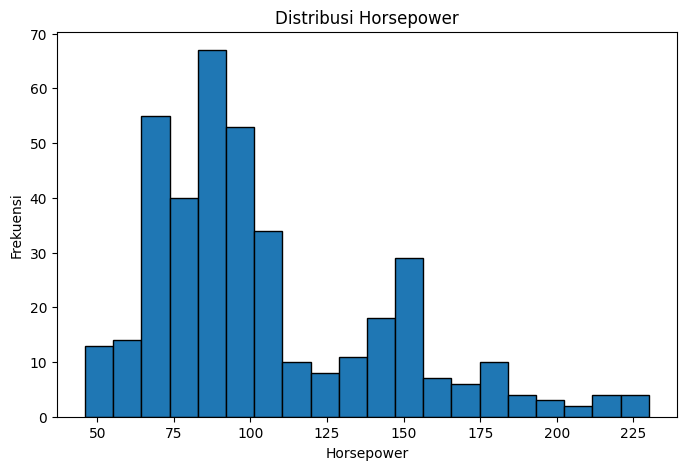

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df["horsepower"], bins=20, edgecolor="black")
plt.xlabel("Horsepower")
plt.ylabel("Frekuensi")
plt.title("Distribusi Horsepower")
plt.show()


## Korelasi Dataset

Korelasi antar kolom numerik divisualisasikan dalam bentuk heatmap, 
sehingga kita bisa melihat seberapa kuat hubungan antar variabel.


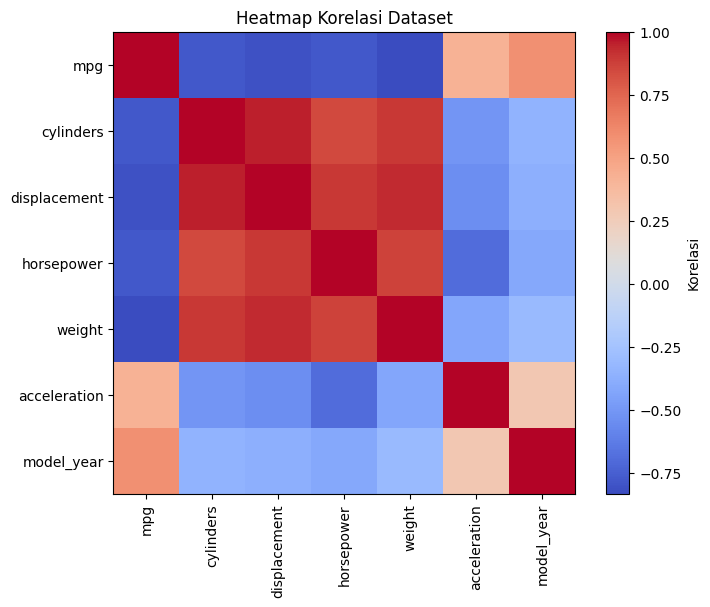

In [21]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Hitung korelasi
corr = numeric_df.corr()

# Plot heatmap manual
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Korelasi")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Heatmap Korelasi Dataset")
plt.show()



# Kesimpulan Analisis Data Automobile.csv

1. **Statistik Deskriptif**
   - Rata-rata konsumsi bahan bakar (`mpg`) sekitar **23.5 mpg** dengan variasi cukup besar.
   - Mobil dalam dataset mayoritas menggunakan **4 silinder**, tetapi ada juga mobil dengan 3, 5, 6, hingga 8 silinder.
   - `horsepower` rata-rata sekitar **105 hp**, dengan sebagian besar mobil berada pada kisaran **70–120 hp**.
   - Berat mobil (`weight`) rata-rata sekitar **2.900 lbs**, dengan rentang dari mobil ringan hingga berat di atas 5.000 lbs.

2. **Distribusi Data**
   - Histogram `horsepower` memperlihatkan distribusi tidak merata, mayoritas mobil berada di kelas menengah.
   - Atribut `origin` menunjukkan variasi mobil dari **USA, Europe, dan Japan**, dengan dominasi mobil asal USA.

3. **Informasi Dataset**
   - Dataset berisi **398 record** dan **9 atribut**.
   - Atribut numerik utama: `mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model_year`.
   - Atribut kategorikal: `name` (unik untuk tiap mobil) dan `origin`.

4. **Korelasi**
   - `weight`, `displacement`, dan `horsepower` memiliki korelasi positif kuat → semakin berat mobil, umumnya semakin besar mesin dan tenaga.
   - `mpg` berkorelasi negatif dengan `weight` dan `displacement` → semakin berat dan semakin besar mesin, konsumsi bahan bakar semakin boros.
   - `model_year` berkorelasi positif dengan `mpg` → mobil yang lebih baru cenderung lebih hemat bahan bakar.

5. **Kesimpulan Utama**
   - Dataset menggambarkan mobil dari tahun 1970-an hingga 1980-an dengan berbagai spesifikasi.
   - Mobil dari **USA** cenderung lebih berat dan boros bahan bakar dibandingkan mobil dari **Europe** dan **Japan**.
   - Tren waktu menunjukkan mobil lebih baru umumnya lebih efisien bahan bakar.
